# Machine learning: jogar tênis
### LIA 2023 - 2

ENGENHARIA DE COMPUTAÇÃO

Aluno: Nina Amaral Boechat de Souza

Importando o database:

In [2]:
import pandas as pd
jogar_tenis = pd.read_csv('/content/drive/MyDrive/LIA/jogartenis.csv')

In [3]:
jogar_tenis

,Tempo,Temperatura,Humidade,Vento,Jogar Tênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradável,Normal,Fraco,Sim
5,Chuvoso,Agradável,Normal,Forte,Não
6,Nublado,Agradável,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradável,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


Adaptando ele para o formato que precisamos:

In [4]:
#separar em X
X_jogar_tenis = jogar_tenis.iloc[:, 0:4].values
X_jogar_tenis

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Forte'],
       ['Nublado', 'Agradável', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [5]:
#e y
y_jogar_tenis = jogar_tenis.iloc[:, 4].values
y_jogar_tenis

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [6]:
#convertendo pra numeros
from sklearn.preprocessing import LabelEncoder

label_encoder_tempo = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_umidade = LabelEncoder()
label_encoder_vento = LabelEncoder()

X_jogar_tenis[:, 0] = label_encoder_tempo.fit_transform(X_jogar_tenis[:, 0])
X_jogar_tenis[:, 1] = label_encoder_temperatura.fit_transform(X_jogar_tenis[:, 1])
X_jogar_tenis[:, 2] = label_encoder_umidade.fit_transform(X_jogar_tenis[:, 2])
X_jogar_tenis[:, 3] = label_encoder_vento.fit_transform(X_jogar_tenis[:, 3])

X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

Montando a árvore de decisões:

In [7]:
import pickle
with open('jogar_tenis.pkl','wb') as f:
  pickle.dump([X_jogar_tenis, y_jogar_tenis],f)

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
with open('/content/jogar_tenis.pkl','rb') as f:
  X_jogar_tenis, y_jogar_tenis = pickle.load(f)

In [10]:
arvore_jogar_tenis = DecisionTreeClassifier(criterion='entropy')

In [11]:
arvore_jogar_tenis.fit(X_jogar_tenis, y_jogar_tenis)


DecisionTreeClassifier(criterion='entropy')

In [12]:
arvore_jogar_tenis.feature_importances_

array([0.51455805, 0.        , 0.21123658, 0.27420537])

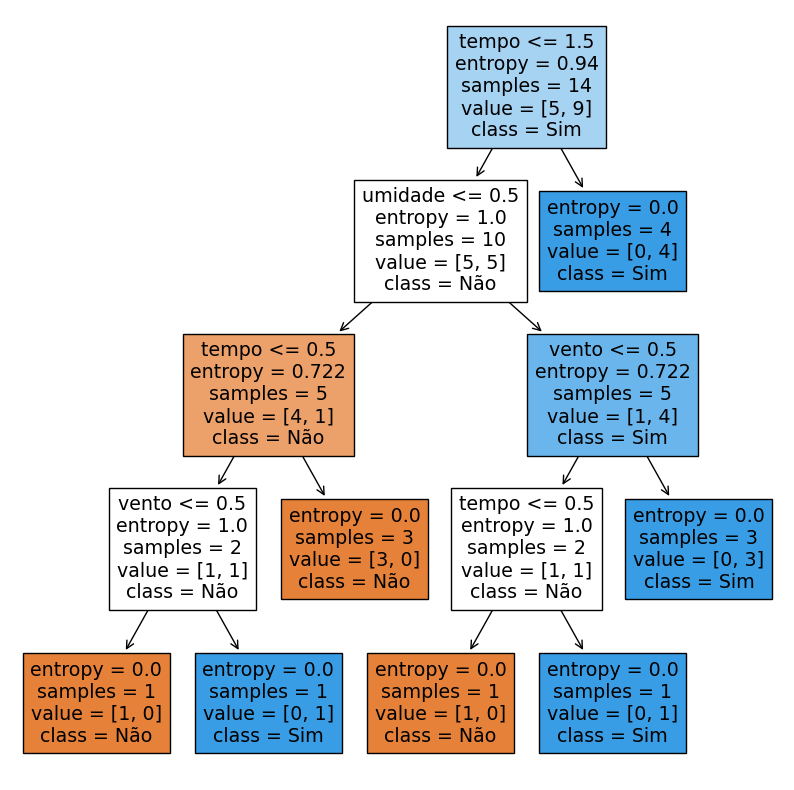

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['tempo','temperatura','umidade','vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize =(10,10))
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores, class_names = arvore_jogar_tenis.classes_, filled=True);

Curiosamente, a temperatura parece não ter sido considerada em nenhum ponto na decisão

Analisando os casos solicitados:

In [18]:
#ensolarado(1), moderada (1), normal (1), forte (0)
previsoes = arvore_jogar_tenis.predict([[1,1,1,0]])
previsoes


array(['Sim'], dtype=object)

In [27]:
#chuvoso (0), agradável (0), normal (1), fraco (1)
previsoes = arvore_jogar_tenis.predict([[0,0,1,1]])
previsoes

array(['Sim'], dtype=object)

In [21]:
#nublado(2), quente (2), normal (1), forte (0)
previsoes = arvore_jogar_tenis.predict([[2,2,1,0]])
previsoes

array(['Sim'], dtype=object)

In [23]:
#nublado (2), agradável (0), alta (0), forte (0)
previsoes = arvore_jogar_tenis.predict([[2,0,0,0]])
previsoes

array(['Sim'], dtype=object)

e um extra para garantir:

In [28]:
#chuvoso (0), moderada (1), normal (1), forte (0)
previsoes = arvore_jogar_tenis.predict([[0,1,1,0]])
previsoes

array(['Não'], dtype=object)